In [464]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [475]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [476]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [477]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [478]:
T = InitT()

In [490]:
def GetRelaxation(T, Nit = int(1e5), omega = 1., tolerancia = 1e-4):
    
    itmax = 0
    
    for it in range(Nit):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r

        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return T,itmax

In [491]:
xx = np.linspace(1,2,50)
yy = np.linspace(1,2,49)
it = []
ome = []

In [492]:
for i in tqdm(range(len(xx)-1)):
    T = InitT()
    T,itmax = GetRelaxation(T,omega = xx[i])
    it.append(itmax)
    ome.append(xx[i])

100%|██████████| 49/49 [00:03<00:00, 15.50it/s]


<IPython.core.display.Javascript object>


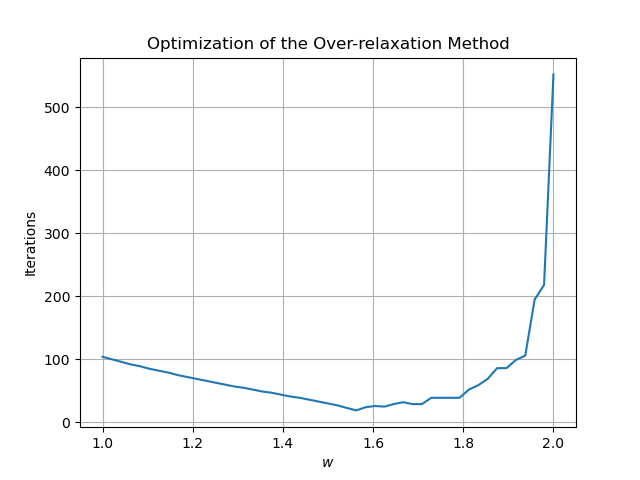

In [493]:
fig, ax = plt.subplots()
N = 49
ax.plot(yy,it)

ax.set_title('Optimization of the Over-relaxation Method')
ax.set_xlabel('$w$')
ax.set_ylabel('Iterations')
ax.grid()

# 2D Navier Stokes Equiations

In [506]:
def parametros():
    N = 51
    V0 = 1
    v = 0.2
    h = 0.02
    lims_obs = [5,5,25,30]
    return N,V0,v,h,lims_obs

In [507]:
N,V0,v,h,lims = parametros()
R = (V0*h)/v

In [508]:
u = np.zeros((N,N))
w = np.zeros((N,N))

In [531]:
def GetRelaxation( Nit = int(1e3), omega = 0.8, tolerancia = 1e-3):
    
    for i in range(1, N-1):
        for j in range(1, N-1):
            tmp = 0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]+h**2 * w[i,j])
            r = (tmp - u[i,j])               
            u[i,j] += omega*r 
             
    for i in range(1, N-1):
        for j in range(1, N-1):
            w1 = 0.25*(w[i+1,j]+w[i-1,j]+w[i,j+1]+w[i,j-1])
            w2 = -R/16 * ((u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j]))
            w3 = R/16 * ((u[i+1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1]))
            tmp = w1 + w2 + w3
            r = (tmp - w[i,j])                
            w[i,j] += omega*r
       
    obstaculo()

In [532]:
def obstaculo():
    
    for i in range(lims[0],lims[2]):
        w[i,lims[1]] = -2/h**2 * (u[i,lims[1]-1]-u[i,lims[1]])
        w[i,lims[3]] = -2/h**2 * (u[i,lims[3]+1]-u[i,lims[3]])
        
    for j in range(lims[1],lims[3]):
        w[lims[0],j] = -2/h**2 * (u[lims[0]-1,j]-u[lims[0],j])
        w[lims[2],j] = -2/h**2 * (u[lims[2]+1,j]-u[lims[2],j])
                         
    for i in range(lims[0],lims[2]):
        for j in range(lims[1],lims[3]):
            u[i,j] = 0
            
    for i in range(lims[0]+1,lims[2]-1):
        for j in range(lims[1]+1,lims[3]-1):       
            w[i,j] = 0

In [548]:
def inicial():
    
    for i in range(N):
        for j in range(N):
            u[i,j] = j*V0
            w[i,j] = 0
    for i in range(N):
        u[i,N-1] = u[i,N-2] + V0*h
        w[i,N-2] = 0   
    for j in range(N):
        u[1,j] = u[0,j]
        w[0,j] = 0        
    for i in range(lims[0],lims[2]):
        for j in range(lims[1],lims[3]):
            u[i,j] = 0
            w[i,j] = 0
    for j in range(1,N-1):
        u[N-1,j] = u[N-2,j]
        w[N-1,j] = w[N-2,j]
            

In [549]:
inicial()
for i in tqdm(range(300)):
    GetRelaxation()

100%|██████████| 300/300 [00:17<00:00, 17.57it/s]


In [550]:
x,y = np.arange(0,N),np.arange(0,N)
X,Y = np.meshgrid(x,y)

xx,yy = np.linspace(0,1,N),np.linspace(0,1,N)
XX,YY = np.meshgrid(xx,yy)

In [551]:
def funcion(u):
    z = u[X,Y]
    return z

In [552]:
U = funcion(u)
W = funcion(w)

<IPython.core.display.Javascript object>


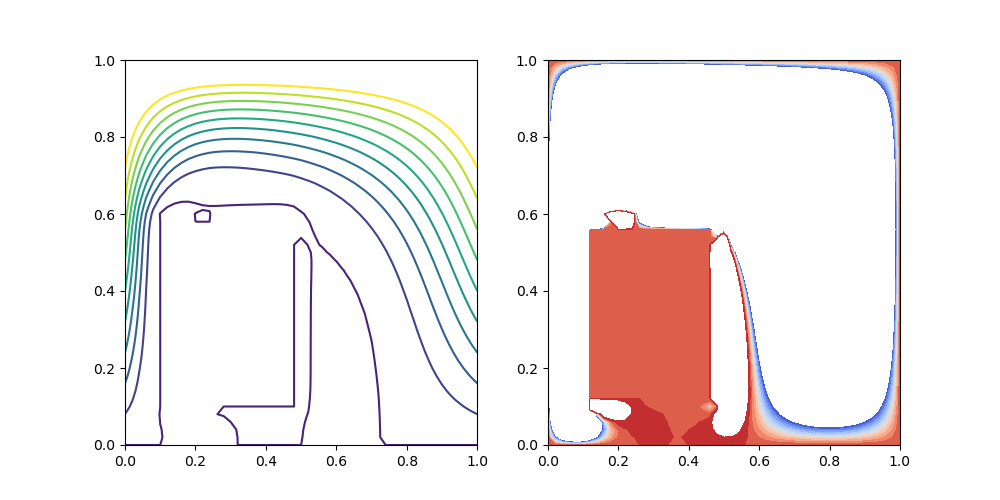

In [553]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.contour(XX,YY,U,levels=[-4,0,4,8,12,16,20,24,28,32,36])
ax1.contourf(XX,YY,W,levels=[-44,-40,-36,-32,-28,-24,-20,-16,-12,-8,-4,0,4],cmap=cm.coolwarm)

In [554]:
def GetGrad(U):
    
    M,N = U.shape
    
    u_ = np.zeros_like(U)
    v_ = np.zeros_like(U)
    
    for i in range(M):
        for j in range(N):
            
            if j == 0:
                v_[i,j] = U[i,j+1] - U[i,j]
            elif j == N - 1:
                v_[i,j] = U[i,j] - U[i,j-1]
            else:
                v_[i,j] = (U[i,j+1] - U[i,j-1])/2.
                
                
            if i == 0:
                u_[i,j] = U[i+1,j] - U[i,j]
            elif i == M - 1:
                u_[i,j] = U[i,j] - U[i-1,j]
            else:
                u_[i,j] = (U[i+1,j] - U[i-1,j])/2.
                
                
    return u_,v_

In [555]:
u, v = GetGrad(U)

<IPython.core.display.Javascript object>


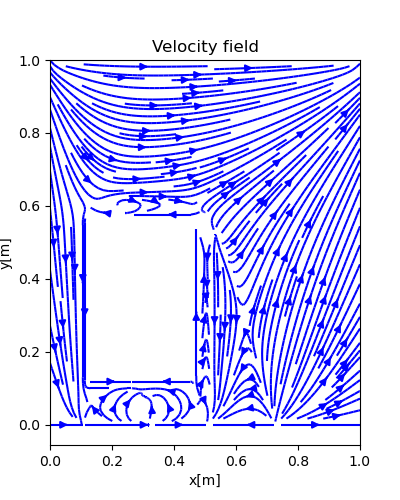

Text(0.5, 0, 'x[m]')

In [556]:
fig2 = plt.figure(figsize=(4,5))
ax = fig2.add_subplot(1,1,1)
ax.streamplot(XX,YY,u,v,color='b',density=2)
ax.set_title('Velocity field')
ax.set_ylabel('y[m]')
ax.set_xlabel('x[m]')